In [1]:
# import pandas as pd
# from sklearn.model_selection import train_test_split

# data = pd.read_csv("../../data/merged_data.csv", index_col=0)
# # 파일 불러오기
# # X_data = pd.read_csv('../../data/X_data.csv')
# # y_data = pd.read_csv('../../data/y_data.csv')

# # bool 타입을 int로 변환
# data['New_Rank'] = data['New_Rank'].astype(int)
# # X_data = X_data.drop(columns=['New_Rank'])

# X_train, X_test, y_train, y_test = train_test_split(data.drop(["Rank"], axis=1), data["Rank"], test_size = 0.2, random_state = 10)


# import pandas as pd
# from sklearn.model_selection import train_test_split

# # 파일 불러오기
# X_data = pd.read_csv('../../data/X_data.csv')
# y_data = pd.read_csv('../../data/y_data.csv')

# # bool 타입을 int로 변환
# X_data['New_Rank'] = X_data['New_Rank'].astype(int)

# # 데이터 분할 (X_data와 y_data 사용)
# X_train, X_test, y_train, y_test = train_test_split(X_data, y_data['Rank'], test_size=0.2, random_state=10)


import pandas as pd
from sklearn.model_selection import train_test_split

# 데이터 불러오기
data = pd.read_csv("../../data/merged_data.csv", index_col=0)

# 'New_Rank' 컬럼을 정수형으로 변환
data['New_Rank'] = data['New_Rank'].astype(int)

# 시계열 데이터를 포함한 CSV 파일 불러오기
new_data = pd.read_csv("../../data/final_total_data.csv")

# 'date' 컬럼을 datetime 형식으로 변환
new_data['date'] = pd.to_datetime(new_data['date'])

# 기존 데이터와 시계열 데이터 병합 (공통 열 기준으로 병합해야 할 경우 예시, 'date' 사용)
# 필요에 따라 on 매개변수를 조정해야 합니다
merged_data = pd.merge(data, new_data, on='date', how='left')

# 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(merged_data.drop(["Rank"], axis=1), 
                                                    merged_data["Rank"], 
                                                    test_size=0.2, 
                                                    random_state=10)



In [2]:
# corr 0.2 이상
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
import numpy as np

LR = LinearRegression()
cols = [col for col in X_train.columns if abs(X_train[col].corr(y_train))>0.2]

# Fit the model and
LR.fit(X_train.drop(columns=cols), y_train)

# Train Predicting with the model
y_train_pred = LR.predict(X_train.drop(columns=cols)).clip(1, 200)

# RMSE Train
LR_rmse = np.sqrt(mse(y_train, y_train_pred))
print(f"RMSE Train = {LR_rmse:.5f}")

#Predicting with the model
y_test_pred = LR.predict(X_test.drop(columns=cols)).clip(1, 200)

# RMSE Test
LR_rmse = np.sqrt(mse(y_test, y_test_pred))
print(f"RMSE Test = {LR_rmse:.5f}")

RMSE Train = 52.88301
RMSE Test = 52.91299


In [3]:
LR = LinearRegression()

# Fit the model and
LR.fit(X_train, y_train)

# Train Predicting with the model
y_train_pred = LR.predict(X_train).clip(1, 200)

# RMSE Train
LR_rmse = np.sqrt(mse(y_train, y_train_pred))
print(f"RMSE Train = {LR_rmse:.6f}")

#Predicting with the model
y_test_pred = LR.predict(X_test).clip(1, 200)

# RMSE Test
LR_rmse = np.sqrt(mse(y_test, y_test_pred))
print(f"RMSE Test = {LR_rmse:.6f}")

RMSE Train = 21.256836
RMSE Test = 21.112740


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

LR = LinearRegression()
cols = [col for col in X_train.columns if abs(X_train[col].corr(y_train)) > 0.2]

# Fit the model
LR.fit(X_train.drop(columns=cols), y_train)

# Train Predicting with the model
y_train_pred = LR.predict(X_train.drop(columns=cols)).clip(1, 200)

# R-squared Train
LR_r2_train = r2_score(y_train, y_train_pred)
print(f"R² Train = {LR_r2_train:.5f}")

# Predicting with the model
y_test_pred = LR.predict(X_test.drop(columns=cols)).clip(1, 200)

# R-squared Test
LR_r2_test = r2_score(y_test, y_test_pred)
print(f"R² Test = {LR_r2_test:.5f}")


R² Train = 0.17069
R² Test = 0.15973


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

LR = LinearRegression()

# Fit the model
LR.fit(X_train, y_train)

# Train Predicting with the model
y_train_pred = LR.predict(X_train).clip(1, 200)

# R-squared Train
LR_r2_train = r2_score(y_train, y_train_pred)
print(f"R² Train = {LR_r2_train:.6f}")

# Predicting with the model
y_test_pred = LR.predict(X_test).clip(1, 200)

# R-squared Test
LR_r2_test = r2_score(y_test, y_test_pred)
print(f"R² Test = {LR_r2_test:.6f}")


R² Train = 0.866006
R² Test = 0.866222


In [6]:
# from IPython.display import display, Math

# def get_printable_equt(df, inter, coef):
#   equtation = '$y = ' + f'{inter:.2f} '
  
#   for i, co in enumerate(coef):
#     if i == len(coef) - 1:
#         equtation = equtation + f'+ {co:.2f} {(df.columns)[i]}$'
#     else:
#         equtation = equtation + f'+ {co:.2f} {(df.columns)[i]}'

#   return display(Math(equtation))

# # 모델 학습 후 방정식 출력
# get_printable_equt(X_train, LR.intercept_, LR.coef_)

from IPython.display import display, Math
import re

def get_printable_equt(df, inter, coef):
    # 수식의 시작 부분
    equtation = '$y = ' + f'{inter:.2f} '
    
    # 열 이름에서 특수 문자를 제거하기 위한 패턴 (LaTeX에서 인식할 수 없는 문자를 제거)
    for i, co in enumerate(coef):
        # 변수명에서 특수 문자를 제거 (예: &, %, $, # 등을 필터링)
        col_name = re.sub(r'[^\w\s]', '', (df.columns)[i])
        
        if i == len(coef) - 1:
            equtation = equtation + f'+ {co:.2f} {col_name}$'
        else:
            equtation = equtation + f'+ {co:.2f} {col_name}'
    
    return display(Math(equtation))

# 모델 학습 후 방정식 출력
get_printable_equt(X_train, LR.intercept_, LR.coef_)


<IPython.core.display.Math object>

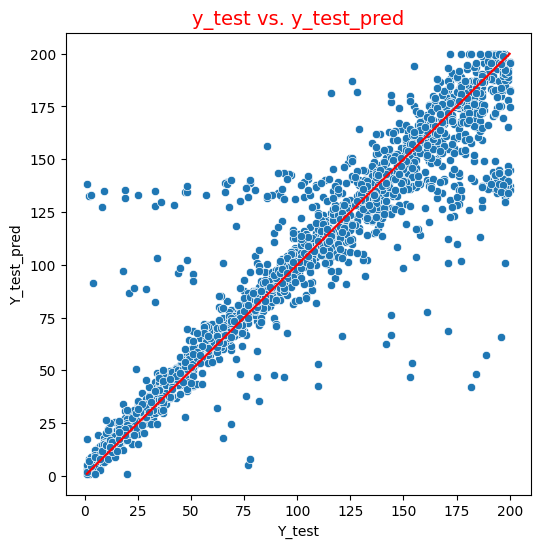

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 그리기
fig, ax = plt.subplots(figsize=(6, 6))

# 산점도 그리기
sns.scatterplot(x=y_test, y=y_test_pred, ax=ax)

# 참값을 보여주는 선 그리기
sns.lineplot(x=y_test, y=y_test, color='red', ax=ax)

# 라벨 및 제목 설정
ax.set_xlabel('Y_test')
ax.set_ylabel('Y_test_pred')
ax.set_title('y_test vs. y_test_pred', fontsize=14, color='red')

# 그래프 출력
plt.show()


In [8]:
import pandas as pd
import statsmodels.api as sm


# X_train에 상수 항 추가
X_train_with_const = sm.add_constant(X_data)

# OLS 모델을 학습시키고 요약 출력
model = sm.OLS(y_data['Rank'], X_train_with_const).fit()

# 결과 요약 출력
print(model.summary())


NameError: name 'X_data' is not defined